In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet     #facebook prophet package

Importing plotly failed. Interactive plots will not work.


In [2]:
# finding out Kaggle cwd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#reading the data set
chicago_df = pd.read_csv('C:\\Users\\aayus\\Desktop\\coding\\project\\Data Science\\crime_data.csv')

In [4]:
chicago_df.shape

(794446, 22)

# Exploring the Dataset

In [5]:
chicago_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10853390,JA157081,02/17/2017 12:20:00 PM,039XX W CHICAGO AVE,031A,ROBBERY,ARMED: HANDGUN,CONVENIENCE STORE,False,False,...,37.0,23.0,03,1150018.0,1905056.0,2017,02/06/2020 03:54:12 PM,41.895384,-87.724470,"(41.895383921, -87.724469836)"
1,11972128,JD139947,03/17/2017 04:00:00 PM,053XX W BELMONT AVE,0890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,30.0,19.0,06,NaN,NaN,2017,02/05/2020 03:55:05 PM,NaN,NaN,NaN
2,11971880,JD140173,09/01/2017 12:01:00 AM,059XX W ADDISON ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,36.0,15.0,02,NaN,NaN,2017,02/05/2020 03:55:05 PM,NaN,NaN,NaN
3,11118466,JA470941,10/14/2017 07:20:00 AM,086XX S HALSTED ST,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False,...,21.0,71.0,02,1172479.0,1847789.0,2017,02/05/2020 03:52:05 PM,41.737771,-87.643664,"(41.737770715, -87.643664418)"
4,11970359,JD138322,04/11/2017 09:00:00 AM,002XX N WALLER AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,29.0,25.0,06,NaN,NaN,2017,02/04/2020 03:58:33 PM,NaN,NaN,NaN


In [6]:
chicago_df.tail(20)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
794426,24534,JC258033,05/10/2019 06:45:00 PM,038XX S MICHIGAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,3.0,35.0,01A,1177828.0,1879596.0,2019,05/17/2019 04:08:03 PM,41.824933,-87.623105,"(41.824933076, -87.623104662)"
794427,24535,JC259222,05/11/2019 05:50:00 PM,050XX W ADAMS ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,28.0,25.0,01A,1143005.0,1898866.0,2019,05/18/2019 04:03:45 PM,41.878531,-87.750382,"(41.878531497, -87.750381613)"
794428,24536,JC259301,05/11/2019 07:27:00 PM,058XX W DIVISION ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,29.0,25.0,01A,1136993.0,1907395.0,2019,05/18/2019 04:03:45 PM,41.902046,-87.772252,"(41.902046108, -87.772251983)"
794429,24537,JC259671,05/12/2019 09:36:00 AM,011XX N ROCKWELL ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1.0,24.0,01A,1158865.0,1907341.0,2019,05/19/2019 04:04:45 PM,41.901477,-87.691914,"(41.901477277, -87.691914103)"
794430,24539,JC262752,05/14/2019 02:13:00 PM,018XX E 86TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,8.0,45.0,01A,1189874.0,1848316.0,2019,05/21/2019 04:08:13 PM,41.738817,-87.579918,"(41.738816655, -87.579917517)"
794431,24540,JC262807,05/14/2019 03:09:00 PM,002XX W 113TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34.0,49.0,01A,1176837.0,1830011.0,2019,05/28/2019 04:05:42 PM,41.688888,-87.628231,"(41.688888496, -87.628231294)"
794432,24541,JC262922,05/14/2019 04:28:00 PM,031XX W MONROE ST,0110,HOMICIDE,FIRST DEGREE MURDER,YARD,False,False,...,28.0,27.0,01A,1155639.0,1899371.0,2019,05/21/2019 04:08:13 PM,41.879672,-87.703978,"(41.879672418, -87.703978301)"
794433,24542,JC264866,05/16/2019 12:43:00 AM,108XX S PRINCETON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,34.0,49.0,01A,1176206.0,1833217.0,2019,05/23/2019 04:10:00 PM,41.697700,-87.630446,"(41.697700386, -87.630445576)"
794434,24544,JC264943,05/16/2019 02:57:00 AM,028XX E 79TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,7.0,46.0,01A,1196634.0,1853138.0,2019,05/23/2019 04:10:00 PM,41.751884,-87.554991,"(41.751883525, -87.554990931)"
794435,24545,JC236433,05/15/2019 02:15:00 AM,041XX W 77TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,...,18.0,70.0,01A,1150345.0,1853061.0,2019,05/22/2019 04:12:53 PM,41.752696,-87.724622,"(41.752696135, -87.724621802)"


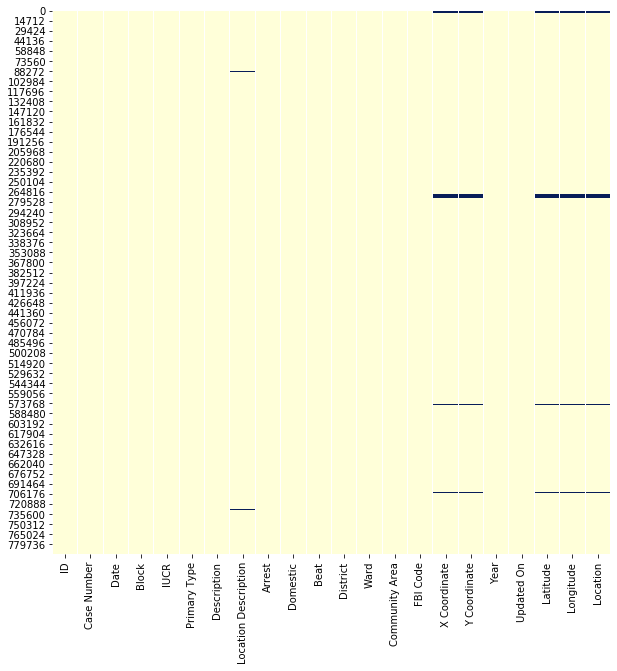

In [7]:
#visualizing and observing the null elements in the dataset
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')   #ploting missing data #cbar, cmap = colour bar, colour map

In [8]:
# Dropping the following columns: ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [9]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,10853390,02/17/2017 12:20:00 PM,039XX W CHICAGO AVE,ROBBERY,ARMED: HANDGUN,CONVENIENCE STORE,False,False
1,11972128,03/17/2017 04:00:00 PM,053XX W BELMONT AVE,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False
2,11971880,09/01/2017 12:01:00 AM,059XX W ADDISON ST,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True
3,11118466,10/14/2017 07:20:00 AM,086XX S HALSTED ST,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False
4,11970359,04/11/2017 09:00:00 AM,002XX N WALLER AVE,THEFT,OVER $500,RESIDENCE,False,False
...,...,...,...,...,...,...,...,...
794441,24551,05/20/2019 06:07:00 PM,078XX S STATE ST,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False
794442,24554,05/23/2019 01:00:00 AM,069XX S MAPLEWOOD AVE,HOMICIDE,FIRST DEGREE MURDER,PORCH,False,False
794443,24556,05/24/2019 02:12:00 AM,013XX W 61ST ST,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,False
794444,24557,05/25/2019 07:01:00 PM,001XX W 109TH PL,HOMICIDE,FIRST DEGREE MURDER,GANGWAY,False,False


In [10]:
#assembling a datetime by rearranging the dataframe column "Date" converting it to date-time format
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')  #I-Hour %p-AM/PM

In [11]:
chicago_df.Date 

0        2017-02-17 12:20:00
1        2017-03-17 16:00:00
2        2017-09-01 00:01:00
3        2017-10-14 07:20:00
4        2017-04-11 09:00:00
                 ...        
794441   2019-05-20 18:07:00
794442   2019-05-23 01:00:00
794443   2019-05-24 02:12:00
794444   2019-05-25 19:01:00
794445   2019-05-25 23:43:00
Name: Date, Length: 794446, dtype: datetime64[ns]

In [12]:
# setting the index to be the date-time column 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [13]:
#counting all the no of elements within a specific column 'Primary Type'
chicago_df['Primary Type'].value_counts()

THEFT                                191854
BATTERY                              148480
CRIMINAL DAMAGE                       83508
ASSAULT                               60296
DECEPTIVE PRACTICE                    56552
OTHER OFFENSE                         51073
NARCOTICS                             39154
BURGLARY                              34351
MOTOR VEHICLE THEFT                   30337
ROBBERY                               29544
CRIMINAL TRESPASS                     20537
WEAPONS VIOLATION                     16462
OFFENSE INVOLVING CHILDREN             6866
CRIM SEXUAL ASSAULT                    4875
PUBLIC PEACE VIOLATION                 4387
INTERFERENCE WITH PUBLIC OFFICER       3939
SEX OFFENSE                            3435
PROSTITUTION                           2133
HOMICIDE                               1777
ARSON                                  1191
LIQUOR LAW VIOLATION                    689
STALKING                                619
KIDNAPPING                      

In [14]:
#top 15 cases
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         191854
BATTERY                       148480
CRIMINAL DAMAGE                83508
ASSAULT                        60296
DECEPTIVE PRACTICE             56552
OTHER OFFENSE                  51073
NARCOTICS                      39154
BURGLARY                       34351
MOTOR VEHICLE THEFT            30337
ROBBERY                        29544
CRIMINAL TRESPASS              20537
WEAPONS VIOLATION              16462
OFFENSE INVOLVING CHILDREN      6866
CRIM SEXUAL ASSAULT             4875
PUBLIC PEACE VIOLATION          4387
Name: Primary Type, dtype: int64

In [15]:
#indices of the top 15 cases
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

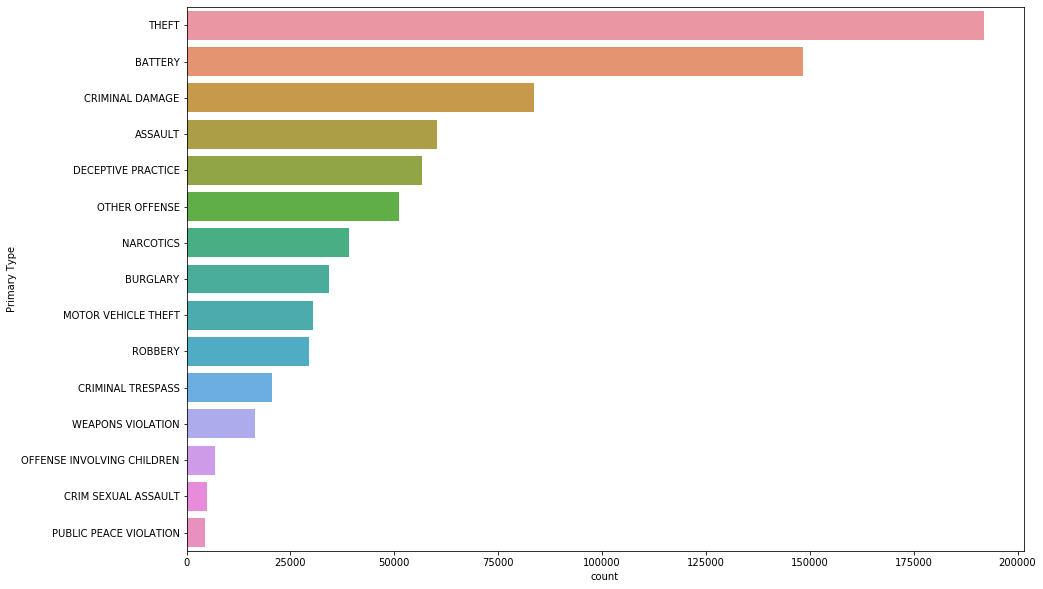

In [16]:
#plotting a bar plot for the top 15 cases
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=chicago_df, order = order_data)

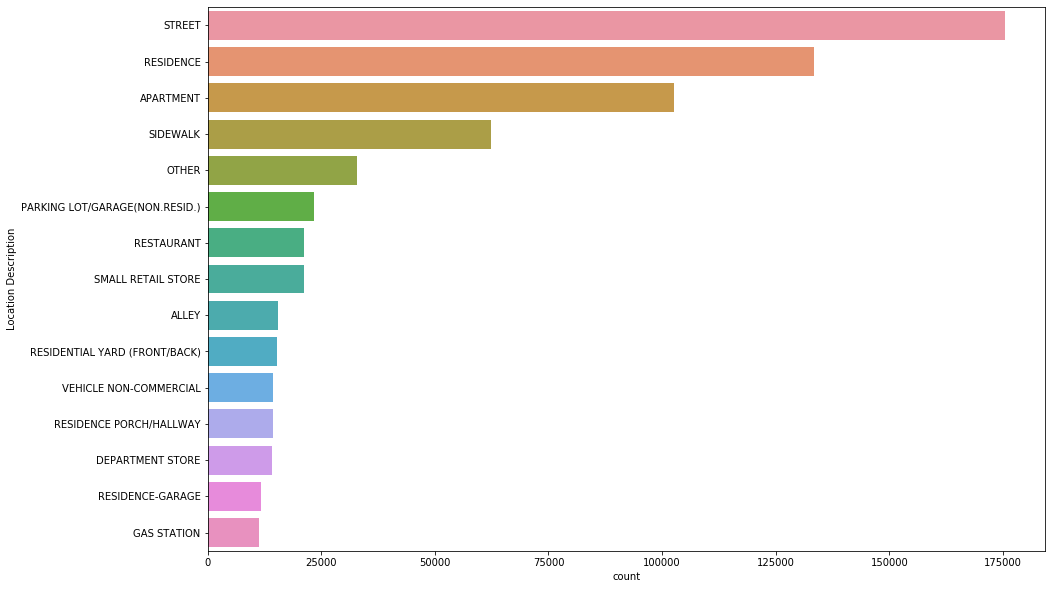

In [17]:
#Locations where the crimes happened
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [18]:
#count the no of crimes occuring in a particular year
chicago_df.resample('Y').size()
#resample is a convenience method for frequency conversion and resampling of time series. 

Date
2017-12-31    268491
2018-12-31    267822
2019-12-31    258133
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

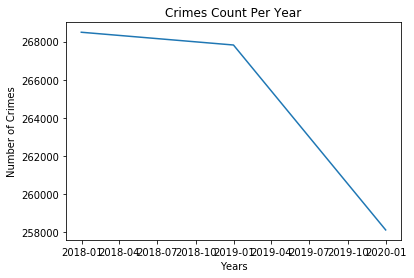

In [19]:
#plotting crimmes occuring each year vs no. of crimes happening in that year
plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [20]:
chicago_df.resample('M').size()         #over the period of 'M' Months

Date
2017-01-31    22071
2017-02-28    19277
2017-03-31    20529
2017-04-30    21663
2017-05-31    23357
2017-06-30    23824
2017-07-31    24833
2017-08-31    24698
2017-09-30    22812
2017-10-31    22888
2017-11-30    21467
2017-12-31    21072
2018-01-31    20417
2018-02-28    17310
2018-03-31    21197
2018-04-30    21098
2018-05-31    24681
2018-06-30    24184
2018-07-31    25201
2018-08-31    25356
2018-09-30    23033
2018-10-31    22789
2018-11-30    20622
2018-12-31    21934
2019-01-31    19556
2019-02-28    18314
2019-03-31    20344
2019-04-30    20879
2019-05-31    23485
2019-06-30    23392
2019-07-31    24677
2019-08-31    24099
2019-09-30    22153
2019-10-31    21397
2019-11-30    19592
2019-12-31    20245
Freq: M, dtype: int64

Text(0, 0.5, 'Number of Crimes')

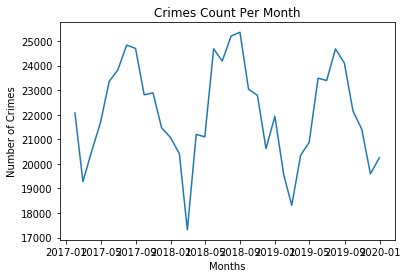

In [21]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [22]:
chicago_df.resample('Q').size()           #over the period of 'Q' Quaters

Date
2017-03-31    61877
2017-06-30    68844
2017-09-30    72343
2017-12-31    65427
2018-03-31    58924
2018-06-30    69963
2018-09-30    73590
2018-12-31    65345
2019-03-31    58214
2019-06-30    67756
2019-09-30    70929
2019-12-31    61234
Freq: Q-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

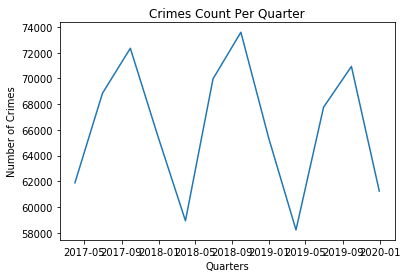

In [23]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# Preparing the Data for Prophet

In [24]:
#performing quality set index
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [25]:
chicago_prophet

,Date,0
0,2017-01-31,22071
1,2017-02-28,19277
2,2017-03-31,20529
3,2017-04-30,21663
4,2017-05-31,23357
5,2017-06-30,23824
6,2017-07-31,24833
7,2017-08-31,24698
8,2017-09-30,22812
9,2017-10-31,22888


In [26]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [27]:
chicago_prophet

,Date,Crime Count
0,2017-01-31,22071
1,2017-02-28,19277
2,2017-03-31,20529
3,2017-04-30,21663
4,2017-05-31,23357
5,2017-06-30,23824
6,2017-07-31,24833
7,2017-08-31,24698
8,2017-09-30,22812
9,2017-10-31,22888


In [28]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [29]:
chicago_prophet_df

,Date,Crime Count
0,2017-01-31,22071
1,2017-02-28,19277
2,2017-03-31,20529
3,2017-04-30,21663
4,2017-05-31,23357
5,2017-06-30,23824
6,2017-07-31,24833
7,2017-08-31,24698
8,2017-09-30,22812
9,2017-10-31,22888


# Making Future Predictions using Prophet

In [30]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [31]:
#renaming the columns into 'ds' and 'y' format for facebook prophet,
#formatting in 'M' for implementation
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [32]:
chicago_prophet_df_final

,ds,y
0,2017-01-31,22071
1,2017-02-28,19277
2,2017-03-31,20529
3,2017-04-30,21663
4,2017-05-31,23357
5,2017-06-30,23824
6,2017-07-31,24833
7,2017-08-31,24698
8,2017-09-30,22812
9,2017-10-31,22888


In [33]:
#instantiating prophet object
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
#forcasting into the future
future = m.make_future_dataframe(periods=720)  #periods = no. of days for prediction
forecast = m.predict(future)

In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-31,22676.743837,21286.734150,22135.817188,22676.743837,22676.743837,-960.508784,-960.508784,-960.508784,-960.508784,-960.508784,-960.508784,0.0,0.0,0.0,21716.235053
1,2017-02-28,22571.046964,18203.948329,19056.470999,22571.046964,22571.046964,-3954.379298,-3954.379298,-3954.379298,-3954.379298,-3954.379298,-3954.379298,0.0,0.0,0.0,18616.667666
2,2017-03-31,22454.025425,20320.769219,21165.533437,22454.025425,22454.025425,-1706.598083,-1706.598083,-1706.598083,-1706.598083,-1706.598083,-1706.598083,0.0,0.0,0.0,20747.427342
3,2017-04-30,22340.778776,21250.644077,22087.793909,22340.778776,22340.778776,-656.753990,-656.753990,-656.753990,-656.753990,-656.753990,-656.753990,0.0,0.0,0.0,21684.024785
4,2017-05-31,22223.851605,23492.316906,24352.360075,22223.851605,22223.851605,1696.799101,1696.799101,1696.799101,1696.799101,1696.799101,1696.799101,0.0,0.0,0.0,23920.650706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2021-12-16,17424.969574,28424.853240,30791.129456,16308.042484,18578.902393,12198.309642,12198.309642,12198.309642,12198.309642,12198.309642,12198.309642,0.0,0.0,0.0,29623.279215
752,2021-12-17,17420.500664,28955.591983,31386.304136,16301.040551,18578.644951,12740.764415,12740.764415,12740.764415,12740.764415,12740.764415,12740.764415,0.0,0.0,0.0,30161.265079
753,2021-12-18,17416.031754,29347.104748,31806.646963,16293.392886,18578.387509,13122.626211,13122.626211,13122.626211,13122.626211,13122.626211,13122.626211,0.0,0.0,0.0,30538.657966
754,2021-12-19,17411.562845,29565.263098,31969.746715,16285.745221,18578.130066,13324.552542,13324.552542,13324.552542,13324.552542,13324.552542,13324.552542,0.0,0.0,0.0,30736.115387


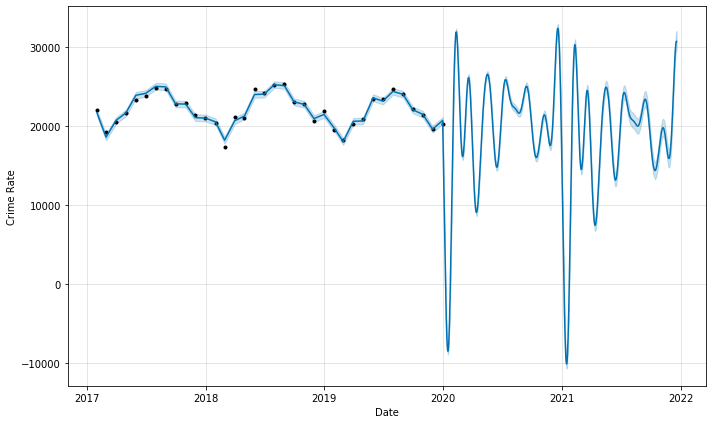

In [36]:
#visualizing future results
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

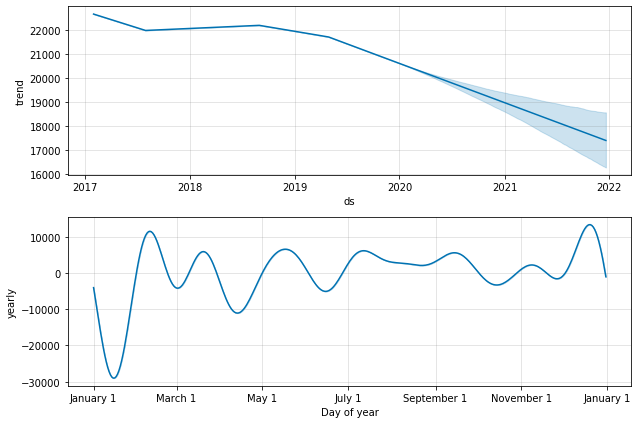

In [37]:
#expected trend in the future
figure3 = m.plot_components(forecast)

# End